# **CREDIT CUSTOMER SEGMENTATION AND RISK MANAGEMENT**

Risk management is one of the efforts made by a company, especially those engaged in the credit sector, such as banks. One thing that can be done is to look at the potential for a customer to experience default or not based on the parameters that exist in the customer, such as age, housing status, the number of jobs, type of savings, and checking account, duration of credit repayments, and the purpose of the credit itself. The analysis carried out on these attributes is then taken into consideration whether the credit proposed by the customer is approved or not. This time, I will segment customers based on their characteristics so that an initial analysis can be carried out on whether these customers have the potential to have bad credit or not.

## **INTRODUCTION**

My name is Raihan Rafif. I am an alumnus of Hacktiv8 full-time program data science batch-001. Previously, I was a fresh graduate with a bachelor of science degree in geographic information science major.

## **WORKING AREA**

### **1. Environment Setup**

In [1]:
# Import the required libraries
import pandas as pd # For general data cleaning and analysis
import numpy as np

import seaborn as sns # For visualization
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler # For data standarization and normalization
from sklearn.preprocessing import OneHotEncoder

from sklearn.cluster import KMeans # For modeling problems
from yellowbrick.cluster import SilhouetteVisualizer

import warnings # For ignoring warnings
warnings.filterwarnings('ignore')

### **2. Import Data**

In [2]:
# Reading the data
df = pd.read_excel("IndonesiaCreditData.xlsx", sheet_name="Dataset")
df # Showing the data

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,14494431,6,radio/TV
1,1,22,female,2,own,little,moderate,73786449,48,radio/TV
2,2,49,male,1,own,little,NaN,25988304,12,education
3,3,45,male,2,free,little,little,97728918,42,furniture/equipment
4,4,53,male,2,free,little,little,60383130,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,21524664,12,furniture/equipment
996,996,40,male,3,own,little,little,47822943,30,car
997,997,38,male,2,own,little,NaN,9968796,12,radio/TV
998,998,23,male,2,free,little,little,22876155,45,radio/TV


In [3]:
# Dropping unnessecary column
df.drop("No", axis=1, inplace=True)

In [4]:
# Renaming columns
df.rename(columns={'Saving accounts' : 'Saving_account', 'Checking account' : 'Checking_account', 'Credit amount' : 'Credit_amount'}, inplace=True, errors='ignore')

In [5]:
# Showing data general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving_account    817 non-null    object
 5   Checking_account  606 non-null    object
 6   Credit_amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


There are 10 variables, namely No, Age, Sex, job, Housing, Saving account, checking account, credit amount, duration, and purpose with 1000 population data. Variable No is omitted because the information is the same as the index, so it is considered to have no variation of information that can be used in the analysis or modeling process. There are two variables that have NaN values, namely savings account and the cecking account.

In [6]:
# Showing unique values in each categorical column
print("Unique values in each categorical column:")
for col in df.select_dtypes(include=[object]): # Selecting the column containing object datatype
    print(col,":", df[col].unique())

Unique values in each categorical column:
Sex : ['male' 'female']
Housing : ['own' 'free' 'rent']
Saving_account : [nan 'little' 'quite rich' 'rich' 'moderate']
Checking_account : ['little' 'moderate' nan 'rich']
Purpose : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


In [7]:
# Identifying NaN values
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving_account      183
Checking_account    394
Credit_amount         0
Duration              0
Purpose               0
dtype: int64

In [8]:
# Replace NaN values into new class
df = df.fillna("None")

There are 183 NaN values and 394 NaN values in the savings account and Checking account. It can be seen that the two variables have something in common. they have an ordinal data class. However, there is no lowest class for the two variables. Thus, the NaN values in the two variables were decided to be used as a new class, namely the None class or the customer class which does not have a saving account or checking account.

### **3. Data Exploration**

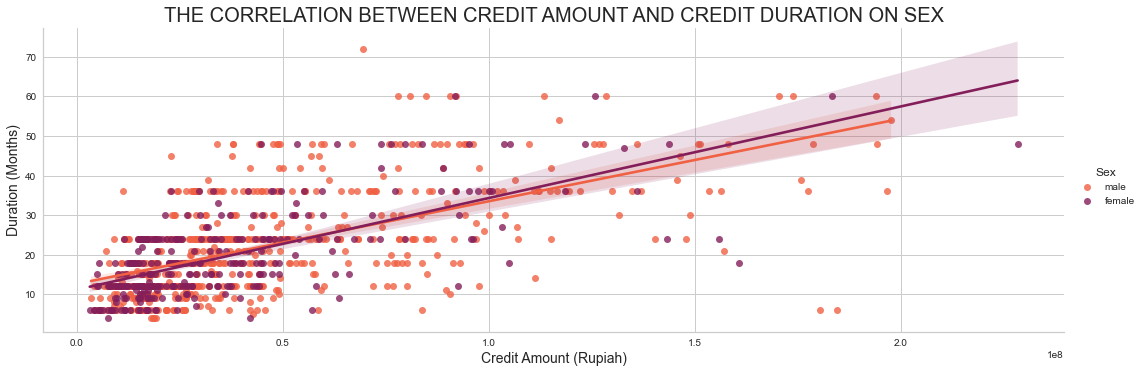

In [9]:
# Credit amount vs duration on sex data distribution
sns.lmplot(x="Credit_amount",y="Duration", hue="Sex", data=df, palette="rocket_r", aspect=3) # lmplotting
plt.title("THE CORRELATION BETWEEN CREDIT AMOUNT AND CREDIT DURATION ON SEX", fontsize=20) # Title
plt.xlabel("Credit Amount (Rupiah)", fontsize=14) # X Label
plt.ylabel("Duration (Months)", fontsize=14) # Y Label
plt.show() # Showing plot

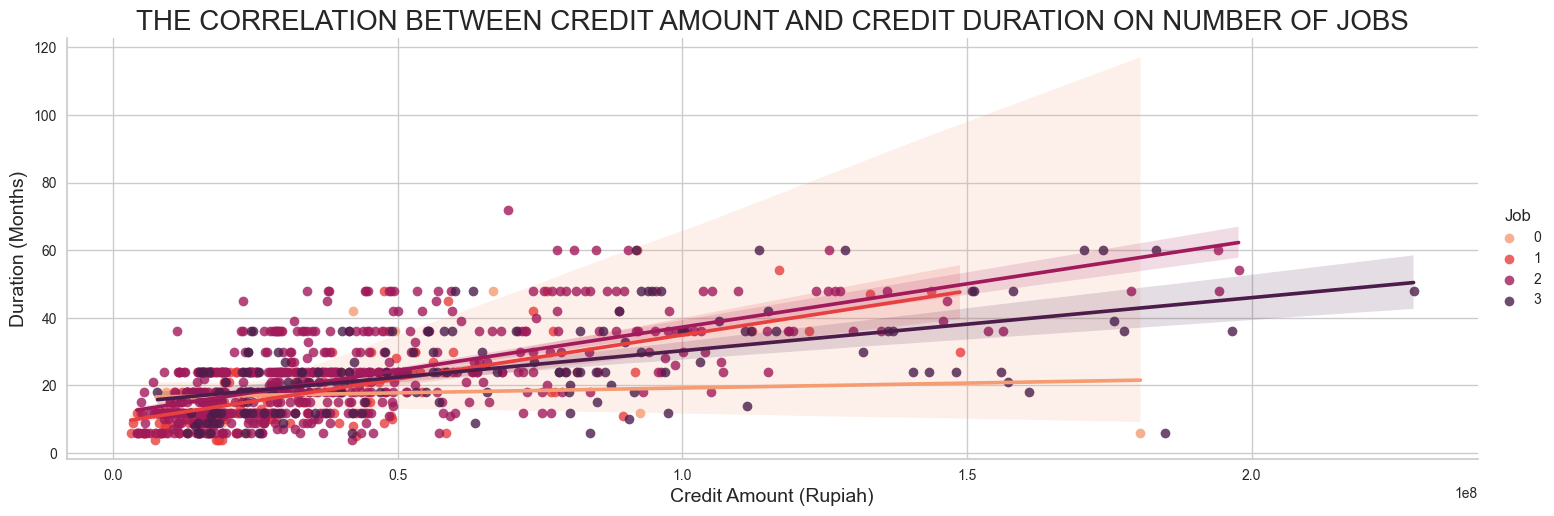

In [10]:
# Credit amount vs duration on number of jobs data distribution
sns.lmplot(x="Credit_amount",y="Duration", hue="Job", data=df, palette="rocket_r", aspect=3) # lmplotting
plt.title("THE CORRELATION BETWEEN CREDIT AMOUNT AND CREDIT DURATION ON NUMBER OF JOBS", fontsize=20) # Title
plt.xlabel("Credit Amount (Rupiah)", fontsize=14) # X Label
plt.ylabel("Duration (Months)", fontsize=14) # Y Label
plt.show() # Showing plot

In general, if you look at the two scatterplots, the relationship between credit amount and duration based on sex and job, both have a positive relationship. That is, the higher the number of credits taken, the longer the credit repayment duration. This is quite reasonable. There is no significant difference between men and women. However, there is a slight difference in the number of jobs held. Although in general, the greater the number of jobs, the more credit one has, this does not apply to the duration of repayment. It can be seen that those who have the longest repayment duration are those who have a number of jobs 2. Meanwhile, people who have a number of jobs 3, choose to take a shorter credit duration even though the number of credits is the highest.

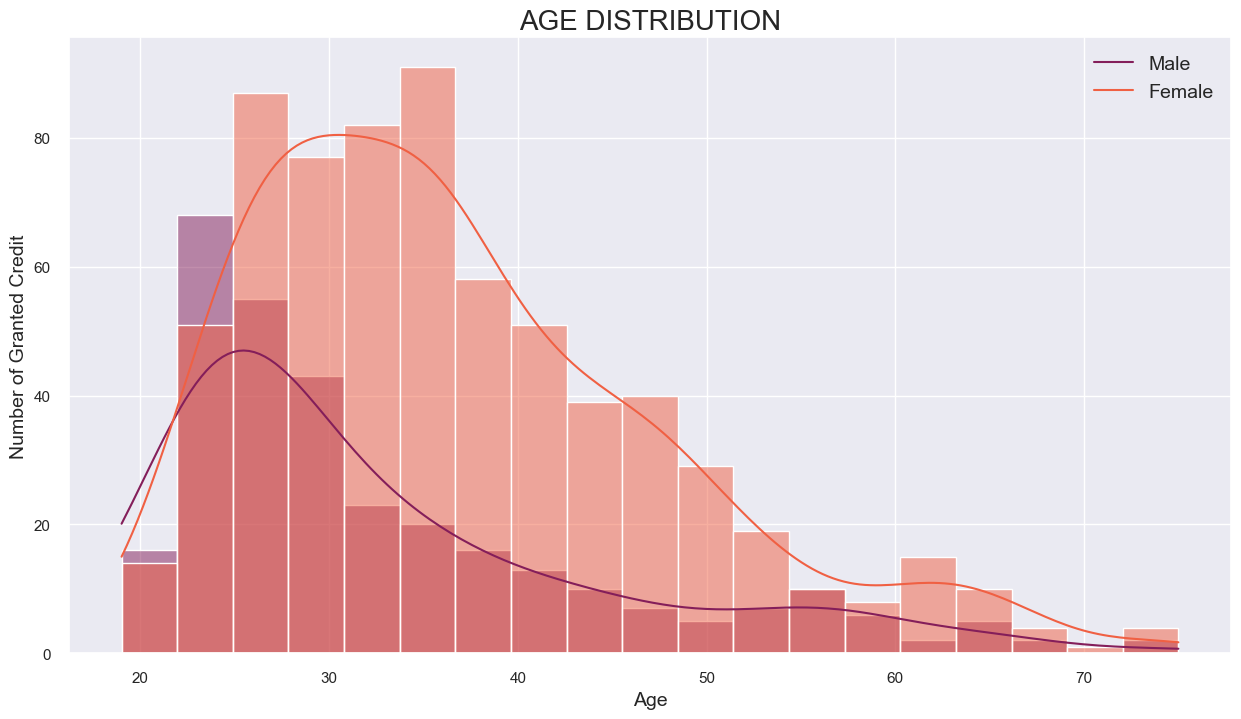

In [11]:
# Identifying age distribution
plt.figure(figsize = (15, 8)) # Setting figure size
sns.set() #set seaborn plotting aesthetics as default
sns.histplot(data=df, x="Age", hue='Sex', kde=True, stat='count', palette='rocket_r') # Histogram plotting
plt.legend(['Male', 'Female'], fontsize=14) # Legend
plt.title("AGE DISTRIBUTION", fontsize=20) # Title
plt.xlabel("Age", fontsize=14) # X Label
plt.ylabel("Number of Granted Credit", fontsize=14) # Y Label
plt.show() # Showing plot

The youngest credit owner in this data is 19 years old, and the oldest is 75 years. In general, the age group can be divided into three categories, namely young adults (19-45 years), middle-aged (45-65 years), and senior citizens (> 65 years). The age of credit owners is of course dominated by young-adult age and female gender. This means that the consumptive activity of women is much higher than that of men at the age of 25 to 50 years. However, it can be seen that at the age of 19 to 24 years, men have more credit than women.

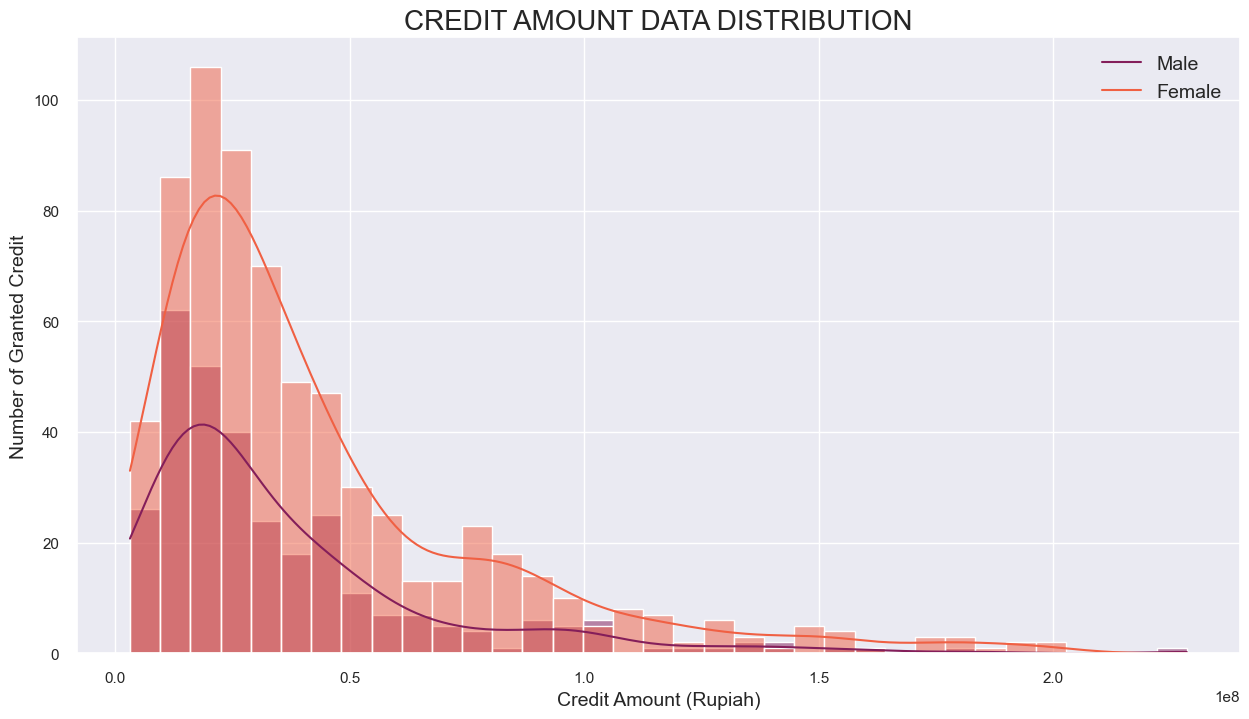

minimum credit amount : 3099750 Rupiah
maximum credit amount : 228439176 Rupiah


In [12]:
# Identifying credit amount data distribution
plt.figure(figsize = (15, 8)) # Setting figure size
sns.set() #set seaborn plotting aesthetics as default
sns.histplot(data=df, x="Credit_amount", kde=True, hue="Sex", stat="count", palette='rocket_r') # Histogram plotting
plt.title("CREDIT AMOUNT DATA DISTRIBUTION", fontsize=20) # Title
plt.legend(['Male', 'Female'], fontsize=14) # Legend
plt.xlabel("Credit Amount (Rupiah)", fontsize=14) # X Label
plt.ylabel("Number of Granted Credit", fontsize=14) # Y Label
plt.show() # Showing plot
print(f"minimum credit amount : {df.Credit_amount.min()} Rupiah")
print(f"maximum credit amount : {df.Credit_amount.max()} Rupiah")

Based on the credit amount data above, it can be seen that the majority of people who make loans have a credit amount of 3 million rupiahs to 5 million rupiahs. Meanwhile, the highest amount of credit is 22 million rupiahs but has a minority quantity or not much.

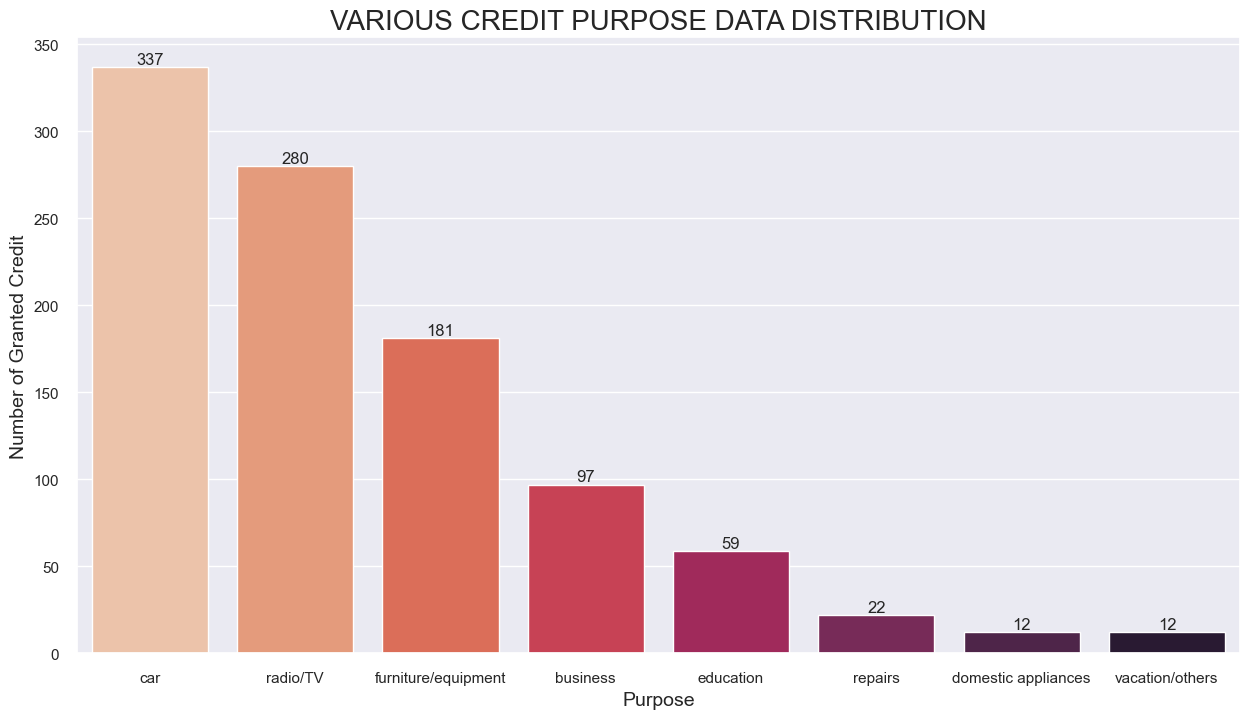

In [13]:
# Credit purpose data distribution
plt.figure(figsize = (15, 8)) # Setting figure size
sns.set() # Sets seaborn aesthetics as default
ax = sns.countplot(data=df, x='Purpose', order=pd.value_counts(df['Purpose']).iloc[::].index, palette='rocket_r') # Count plotting
ax.bar_label(ax.containers[0], label_type='edge') # Labeling each bar
plt.title('VARIOUS CREDIT PURPOSE DATA DISTRIBUTION', fontsize = 20) # Title
plt.xlabel('Purpose', fontsize = 14) # X Lable
plt.ylabel('Number of Granted Credit', fontsize = 14) # Y Lable
plt.show() # Showing plot

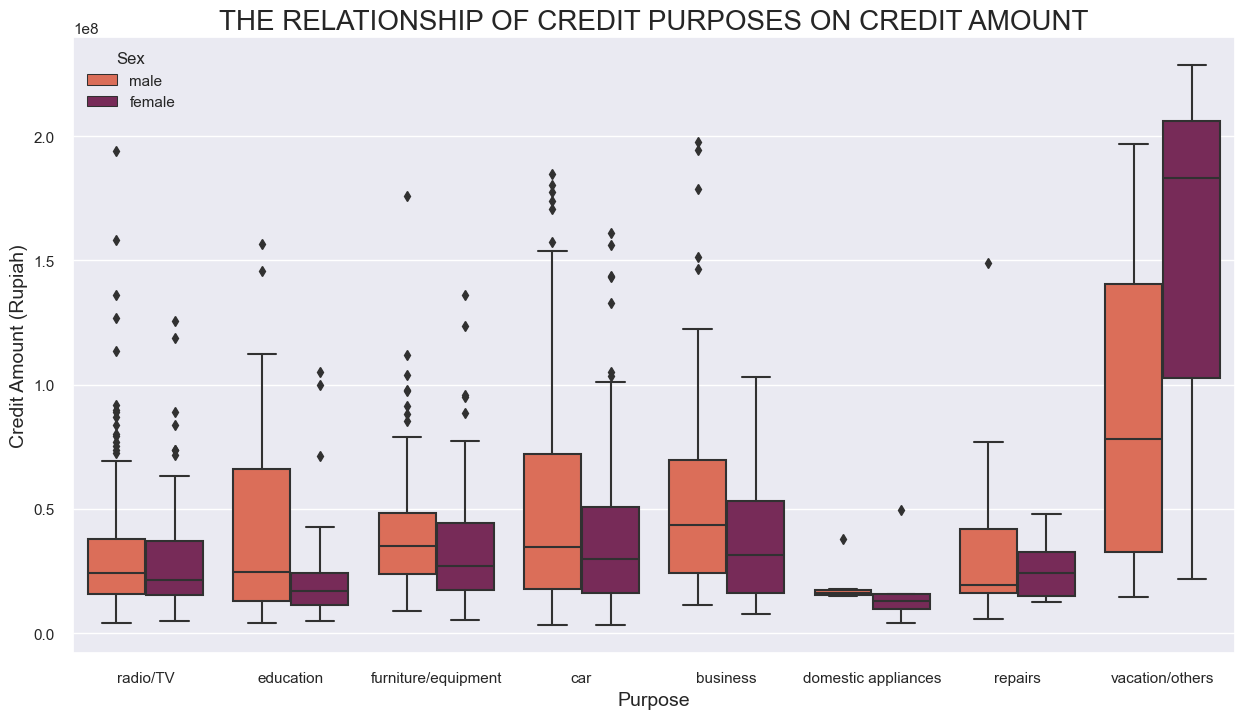

In [14]:
# Purpose vs credit amount data distribution
plt.figure(figsize=(15,8)) # Setting figure size
sns.set() # Sets seaborn aesthetics as default
sns.boxplot(x='Purpose',y='Credit_amount', hue='Sex', data=df, palette='rocket_r') # Box plotting
plt.title('THE RELATIONSHIP OF CREDIT PURPOSES ON CREDIT AMOUNT', fontsize = 20) # Title
plt.xlabel('Purpose', fontsize = 14) # X Lable
plt.ylabel('Credit Amount (Rupiah)', fontsize = 14) # Y Lable
plt.show() # Showing plot

Based on the purpose of the customer's credit, it can be seen that the majority of credit is used to buy cars, TVs, and furniture. However, when viewed from the number of credits, it is surprising that vacation has the highest number of credits.

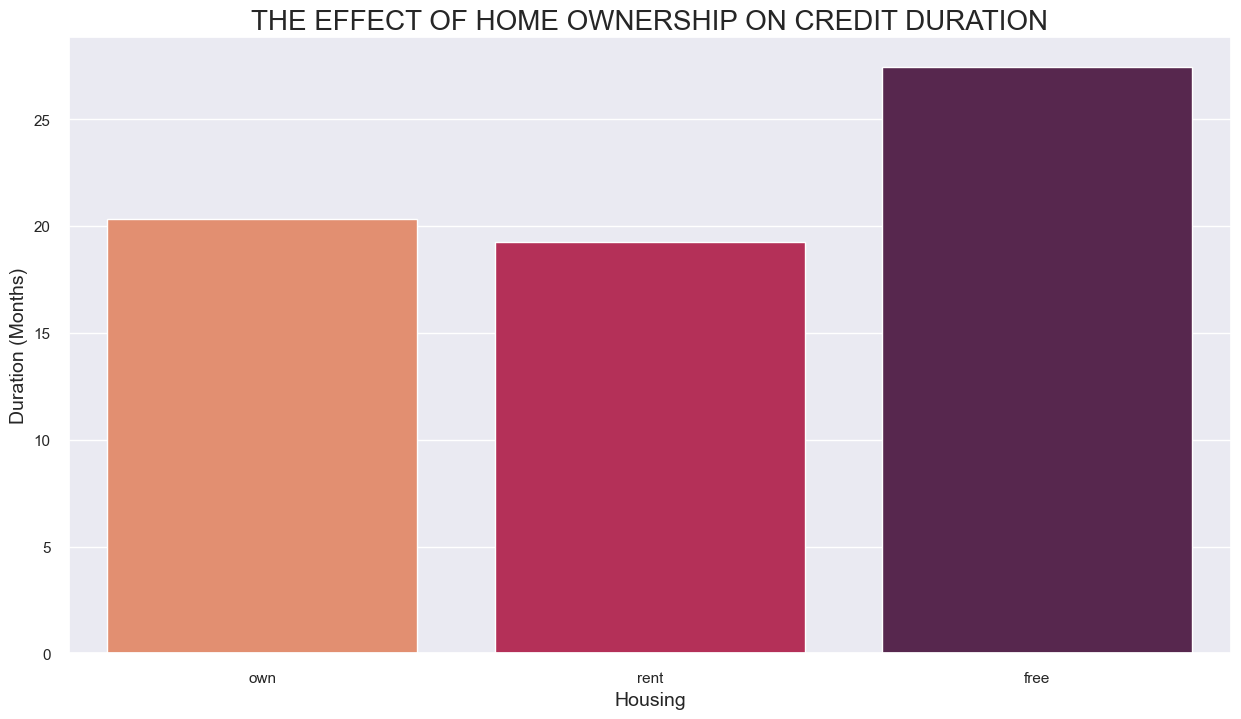

In [15]:
# Housing vs duration data distribution
plt.figure(figsize = (15, 8)) # Setting figure size
sns.set() # Sets seaborn aesthetics as default
sns.barplot(data=df, x='Housing', y='Duration', order=pd.value_counts(df['Housing']).iloc[::].index, palette='rocket_r', ci=None) # Bar plotting
plt.title('THE EFFECT OF HOME OWNERSHIP ON CREDIT DURATION', fontsize = 20) # Title
plt.xlabel('Housing', fontsize = 14) # X Lable
plt.ylabel('Duration (Months)', fontsize = 14) # Y Lable
plt.show() # Showing plot

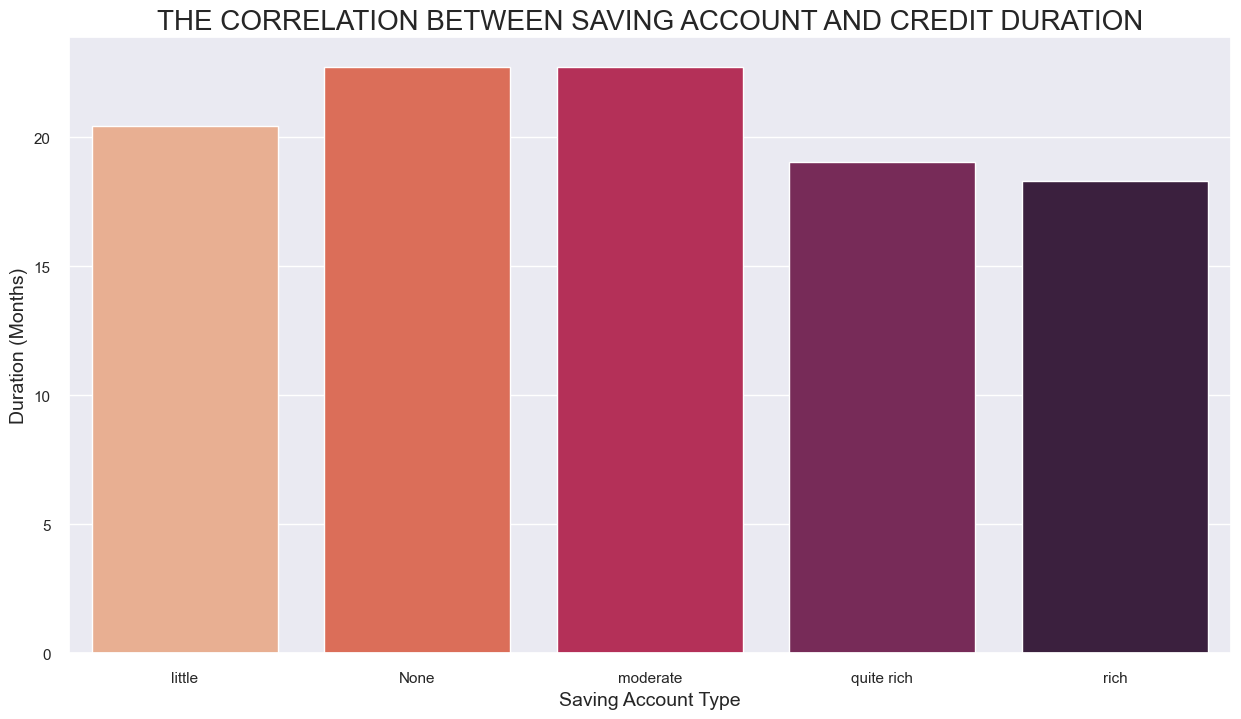

In [16]:
# Saving account vs duration data distribution
plt.figure(figsize = (15, 8)) # Setting figure size
sns.set() # Sets seaborn aesthetics as default
sns.barplot(data=df, x='Saving_account', y='Duration', order=pd.value_counts(df['Saving_account']).iloc[::].index, palette='rocket_r', ci=None) # Bar plotting
plt.title('THE CORRELATION BETWEEN SAVING ACCOUNT AND CREDIT DURATION', fontsize = 20) # Title
plt.xlabel('Saving Account Type', fontsize = 14) # X Lable
plt.ylabel('Duration (Months)', fontsize = 14) # Y Lable
plt.show() # Showing plot

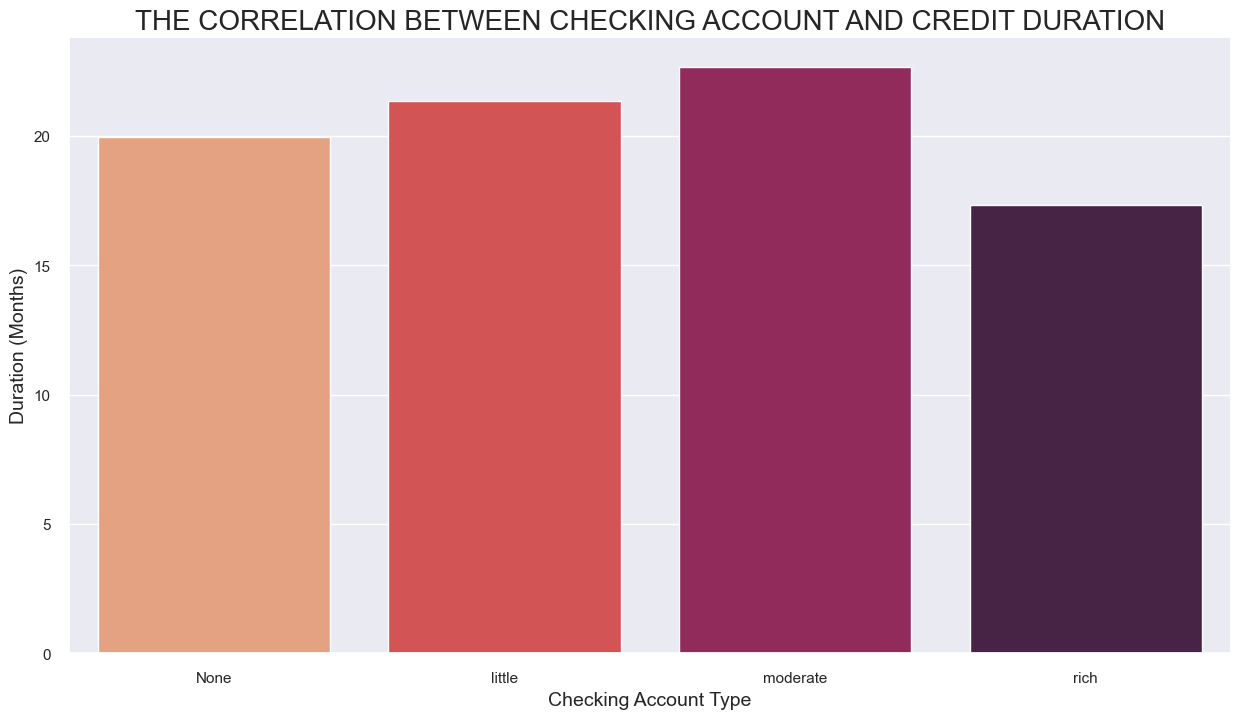

In [17]:
# Checking account vs duration data distribution
plt.figure(figsize = (15, 8)) # Setting figure size
sns.set() # Sets seaborn aesthetics as default
sns.barplot(data=df, x='Checking_account', y='Duration', order=pd.value_counts(df['Checking_account']).iloc[::].index, palette='rocket_r', ci=None) # Bar plotting
plt.title('THE CORRELATION BETWEEN CHECKING ACCOUNT AND CREDIT DURATION', fontsize = 20) # Title
plt.xlabel('Checking Account Type', fontsize = 14) # X Lable
plt.ylabel('Duration (Months)', fontsize = 14) # Y Lable
plt.show() # Showing plot

The graph above is a graph of the relationship between the duration of credit and the status of housing, saving accounts, and checking accounts. In general, it can be seen that people with free housing are the ones who have the longest duration. Meanwhile, based on saving accounts and checking accounts, have similarities, that is, people who fall into the rich category tend to have shorter credit durations.

### **4. Model Preprocessing**

**FEATURE SELECTION**

In [18]:
# breakdown the column
Number = df.loc[:,["Age","Credit_amount", "Duration"]]
Category1 = df.loc[:,["Job"]]
Category2 = df.loc[:,["Sex", "Housing", "Saving_account", "Checking_account", "Purpose"]]

**OUTLIERS HANDLING**

In [19]:
# distplot function
def distributions(df):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.distplot(df["Age"], ax=ax1)
    sns.distplot(df["Credit_amount"], ax=ax2)
    sns.distplot(df["Duration"], ax=ax3)
    plt.tight_layout()

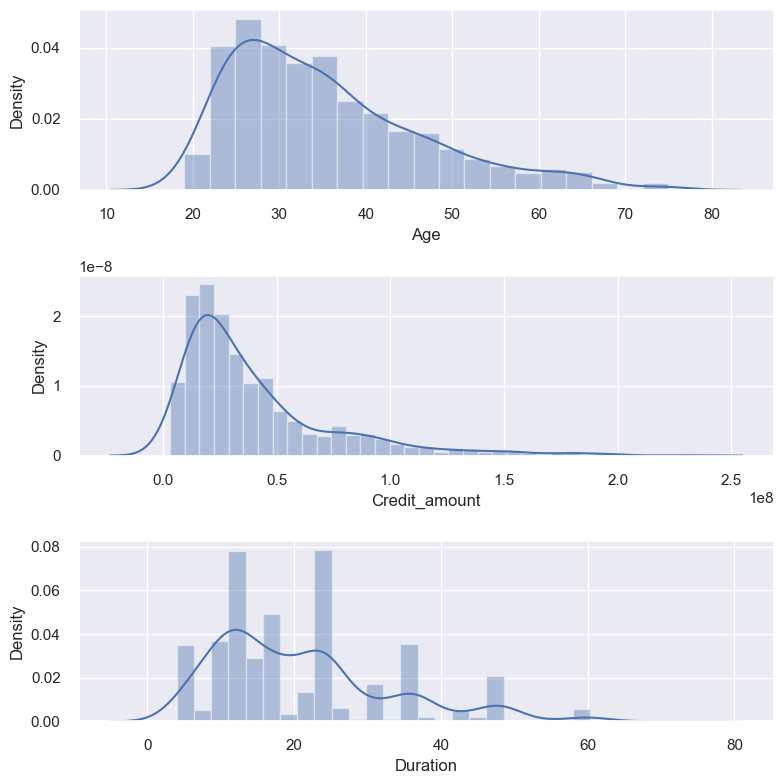

In [20]:
distributions(Number)

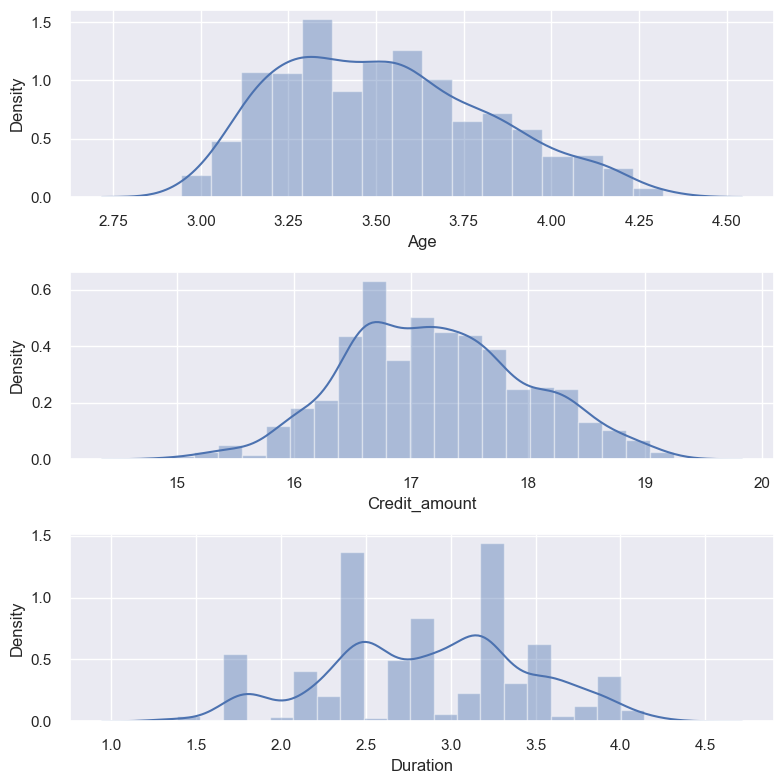

In [21]:
# Applying logaritmic function to normalize the distribution of numerical data
Number_log = np.log(Number)
distributions(Number_log)

**DATA ENCODING**

In [22]:
# Defining encoding function
ohe = OneHotEncoder()
Category2_encoded = ohe.fit_transform(Category2).toarray() # Fit and transform the data to be encoded
Category2_encoded

array([[0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

**DATA SCALING**

In [23]:
# Defining scaling function
scaler = StandardScaler()
Number_scaled = scaler.fit_transform(Number_log) # Fit and transform the data to be scaled
Number_scaled

array([[ 2.27100592, -0.933901  , -1.86486906],
       [-1.44615223,  1.16304581,  1.7083687 ],
       [ 1.22669602, -0.1815588 , -0.67378981],
       ...,
       [ 0.37810951, -1.4161991 , -0.67378981],
       [-1.29778048, -0.34591111,  1.59746802],
       [-0.76258638,  0.82450846,  1.59746802]])

**DATA MERGING**

In [24]:
# Merged all data
data_final = np.concatenate([Number_scaled, Category1, Category2_encoded], axis=1)
data_final

array([[ 2.27100592, -0.933901  , -1.86486906, ...,  1.        ,
         0.        ,  0.        ],
       [-1.44615223,  1.16304581,  1.7083687 , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.22669602, -0.1815588 , -0.67378981, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.37810951, -1.4161991 , -0.67378981, ...,  1.        ,
         0.        ,  0.        ],
       [-1.29778048, -0.34591111,  1.59746802, ...,  1.        ,
         0.        ,  0.        ],
       [-0.76258638,  0.82450846,  1.59746802, ...,  0.        ,
         0.        ,  0.        ]])

In [25]:
# Assigning data into dataFrame
df_final = pd.DataFrame(data_final)
df_final

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,2.271006,-0.933901,-1.864869,2.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.446152,1.163046,1.708369,2.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.226696,-0.181559,-0.673790,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.942455,1.525148,1.478913,2.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.488620,0.904743,0.517289,2.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.301466,-0.424376,-0.673790,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
996,0.549317,0.604255,0.900731,3.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.378110,-1.416199,-0.673790,2.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
998,-1.297780,-0.345911,1.597468,2.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### **5. Model Development**

**FINDING OPTIMAL NUMBER OF CLUSTERS**

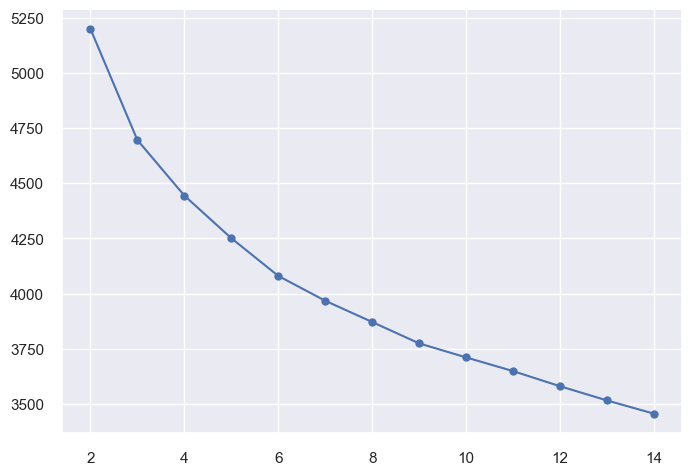

In [26]:
clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(data_final)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range,inertias, marker='o')

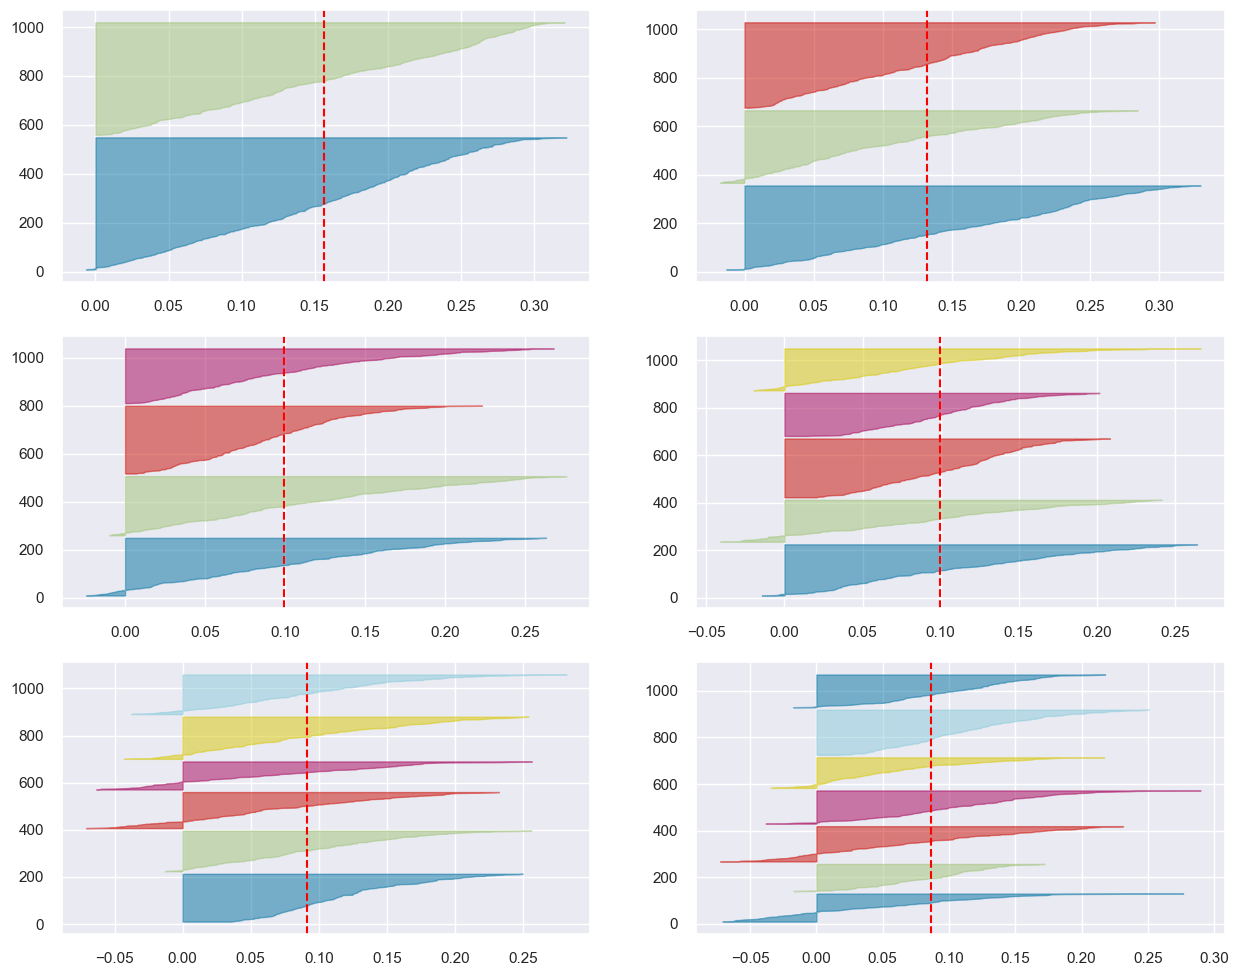

In [27]:
# Optimal number of clusters
fig, ax = plt.subplots(3, 2, figsize=(15,12))
for i in [2, 3, 4, 5, 6, 7]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=500, random_state=42)
    q, mod = divmod(i, 2)
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_final)

Based on the results of the silhouette visualization, cluster 4 is the most ideal number of clusters.

**GENERATION K-MEANS MODEL**

In [28]:
# Defining k number
k = 4
kmeans = KMeans(n_clusters=k, max_iter = 500, random_state=42) # k-means clustering model

In [29]:
# Model prediction
y_pred = kmeans.fit_predict(data_final)

In [30]:
# Showing output labels
kmeans.labels_

array([0, 2, 0, 1, 1, 1, 0, 1, 0, 1, 3, 2, 3, 0, 2, 2, 0, 1, 1, 2, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 1, 2, 2, 1, 0, 3, 2, 1, 0, 3, 3, 2, 3, 1, 2,
       1, 3, 1, 3, 0, 3, 2, 1, 3, 2, 1, 3, 0, 1, 2, 2, 3, 0, 1, 1, 2, 1,
       3, 3, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 2, 0, 0, 3, 2, 1,
       2, 3, 0, 0, 3, 2, 0, 1, 0, 2, 1, 1, 0, 2, 3, 3, 2, 1, 1, 1, 1, 3,
       3, 3, 2, 1, 0, 1, 1, 3, 2, 0, 2, 1, 3, 0, 2, 3, 0, 3, 3, 2, 1, 1,
       2, 0, 1, 3, 1, 0, 2, 0, 3, 1, 2, 2, 2, 1, 3, 0, 1, 0, 0, 0, 1, 1,
       1, 3, 0, 0, 1, 3, 2, 3, 0, 0, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 1,
       0, 0, 3, 0, 1, 1, 0, 1, 3, 3, 0, 0, 3, 2, 1, 1, 1, 3, 2, 3, 3, 3,
       1, 1, 0, 3, 2, 3, 0, 1, 0, 3, 2, 0, 3, 1, 1, 0, 1, 3, 2, 2, 2, 0,
       3, 3, 3, 2, 2, 2, 1, 1, 3, 2, 2, 0, 0, 3, 0, 2, 2, 0, 3, 1, 2, 0,
       1, 3, 2, 2, 0, 3, 2, 3, 3, 0, 2, 1, 3, 1, 2, 3, 2, 0, 3, 0, 1, 0,
       3, 3, 1, 2, 1, 2, 2, 3, 1, 1, 1, 3, 2, 0, 3, 2, 2, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 3, 1, 1, 1, 1, 1, 2, 0, 0, 2, 0,

Text(0.5, 1.0, 'K-means Clustering Visualization')

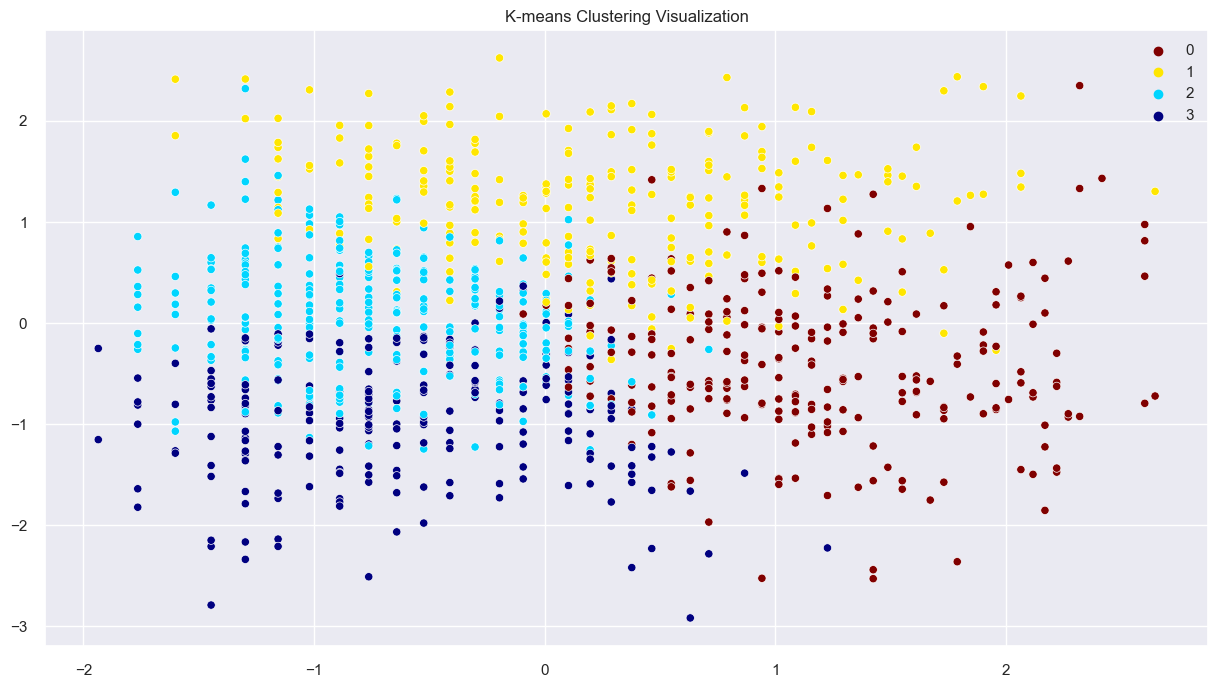

In [31]:
# Setting figure size
plt.figure(figsize = (15, 8))
ax = sns.scatterplot(x = data_final[:,0], y = data_final[:,1], hue = kmeans.labels_, palette = 'jet_r') # Scatter plotting
ax.set_title('K-means Clustering Visualization')

**CLUSTER MODEL ANALYSIS**

In [32]:
# Defining cluster output column
df['labels'] = kmeans.labels_

In [33]:
df

,Age,Sex,Job,Housing,Saving_account,Checking_account,Credit_amount,Duration,Purpose,labels
0,67,male,2,own,None,little,14494431,6,radio/TV,0
1,22,female,2,own,little,moderate,73786449,48,radio/TV,2
2,49,male,1,own,little,None,25988304,12,education,0
3,45,male,2,free,little,little,97728918,42,furniture/equipment,1
4,53,male,2,free,little,little,60383130,24,car,1
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,None,21524664,12,furniture/equipment,3
996,40,male,3,own,little,little,47822943,30,car,1
997,38,male,2,own,little,None,9968796,12,radio/TV,3
998,23,male,2,free,little,little,22876155,45,radio/TV,2


Text(0.5, 1.0, 'CLASTER OUTPUT LABELS')

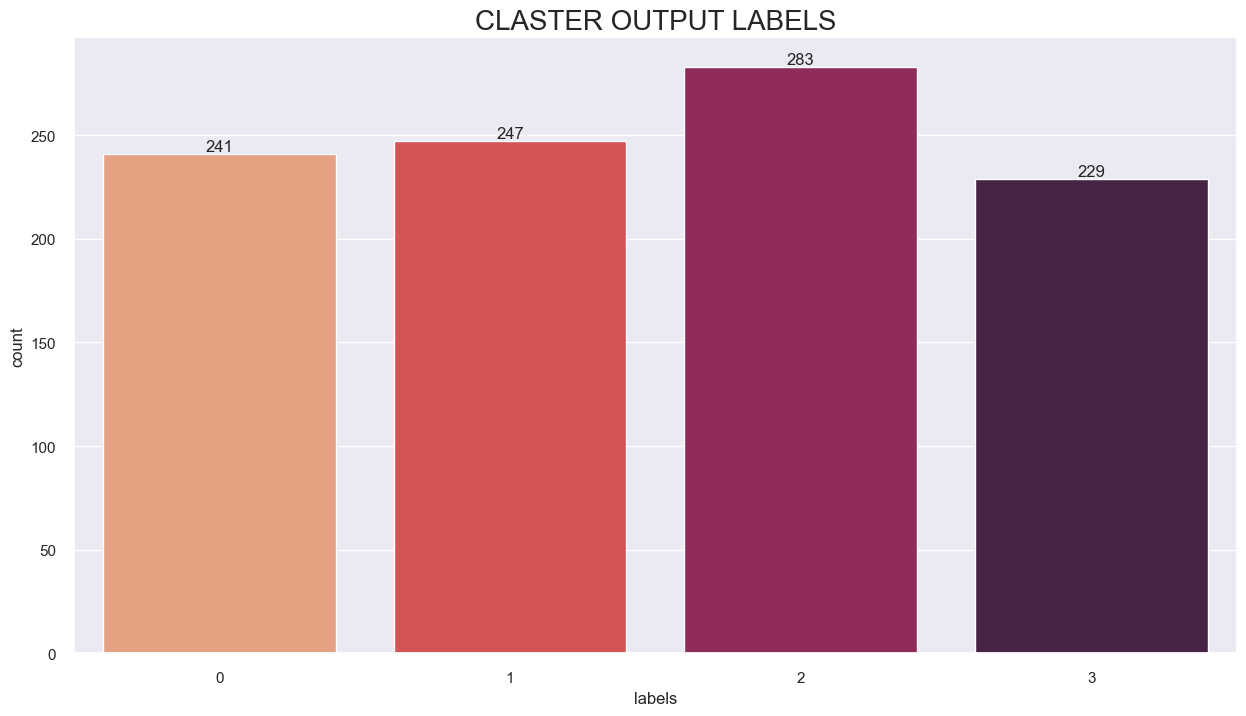

In [34]:
# Setting figure size
plt.figure(figsize=(15,8))
ax = sns.countplot(data=df, x='labels', palette='rocket_r') # Count plotting
ax.bar_label(ax.containers[0], label_type='edge') # Setting the label
plt.title("CLASTER OUTPUT LABELS", fontsize=20)

In [35]:
#separating the dataframe by cluster
cluster_0 = df[df['labels'] == 0]
cluster_1 = df[df['labels'] == 1]
cluster_2 = df[df['labels'] == 2]
cluster_3 = df[df['labels'] == 3]

In [36]:
#summary for each cluster
num_columns = ['Age', 'Credit_amount', 'Duration']
d={}
for i in num_columns:  
    d[i] = pd.DataFrame(df.groupby('labels', axis = 0)[i].describe()[['mean', '50%', 'min', 'max']])
pd.concat(d, axis =1)

Age                   Credit_amount                          \
             mean   50%   min   max          mean         50%         min   
labels                                                                      
0       48.921162  47.0  33.0  75.0  2.580926e+07  19801203.0   4190862.0   
1       37.566802  36.0  21.0  75.0  8.361469e+07  78274887.0  22553781.0   
2       27.784452  27.0  20.0  42.0  3.533776e+07  32621769.0  11270691.0   
3       28.882096  28.0  19.0  49.0  1.609991e+07  15325164.0   3099750.0   

                      Duration                    
                max       mean   50%   min   max  
labels                                            
0       184695504.0  14.253112  12.0   4.0  42.0  
1       228439176.0  35.174089  36.0  12.0  72.0  
2       180467445.0  22.554770  24.0   6.0  48.0  
3        57171789.0  10.467249  12.0   4.0  18.0

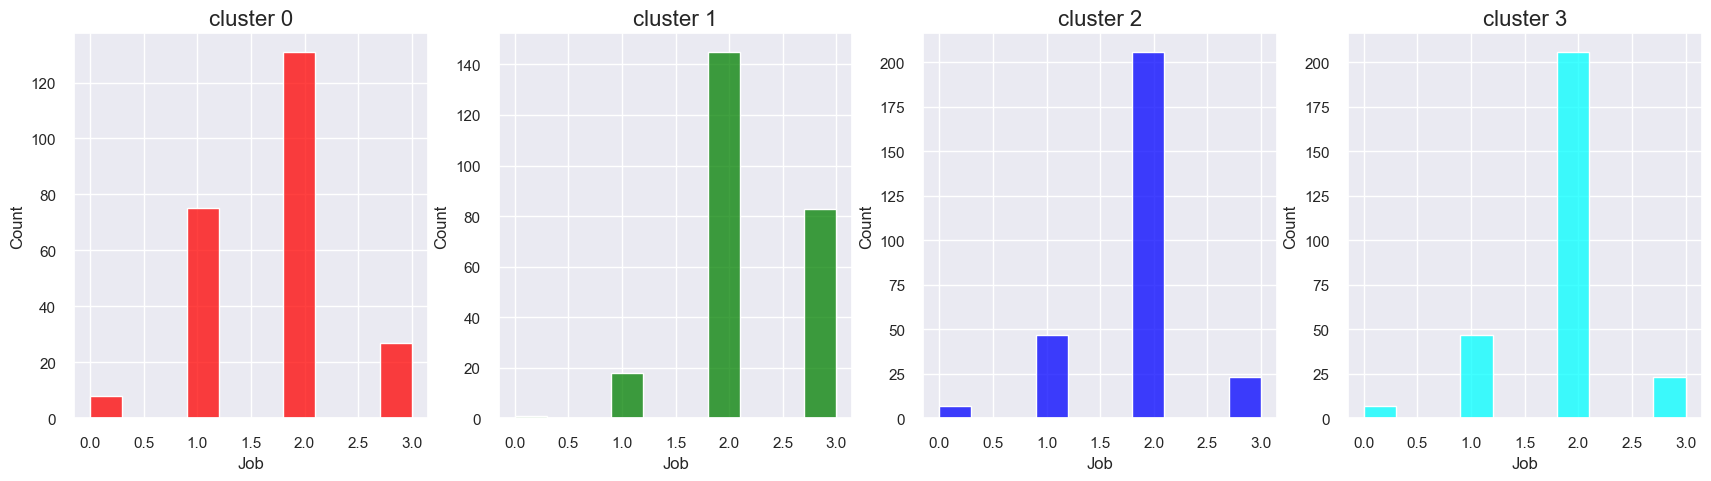

In [43]:
# Plot comparison Job from each cluster
plt.figure(figsize=(21,5)) # Setting figure size
plt.subplot(1,4,1) # Plot 1
sns.histplot(cluster_0['Job'], color = 'red') # Histogram
plt.title('cluster 0', size = 16) # Srting title
plt.subplot(1,4,2) # Plot 2
sns.histplot(cluster_1['Job'], color='green' ) # Histogram
plt.title('cluster 1', size = 16) # Setting title
plt.subplot(1,4,3) # Plot 3
sns.histplot(cluster_2['Job'], color='blue') # Histogram
plt.title('cluster 2', size = 16) # Setting title
plt.subplot(1,4,4) # Plot 3
sns.histplot(cluster_2['Job'], color='cyan') # Histogram
plt.title('cluster 3', size = 16)  # Setting title
plt.show() # Showing plot

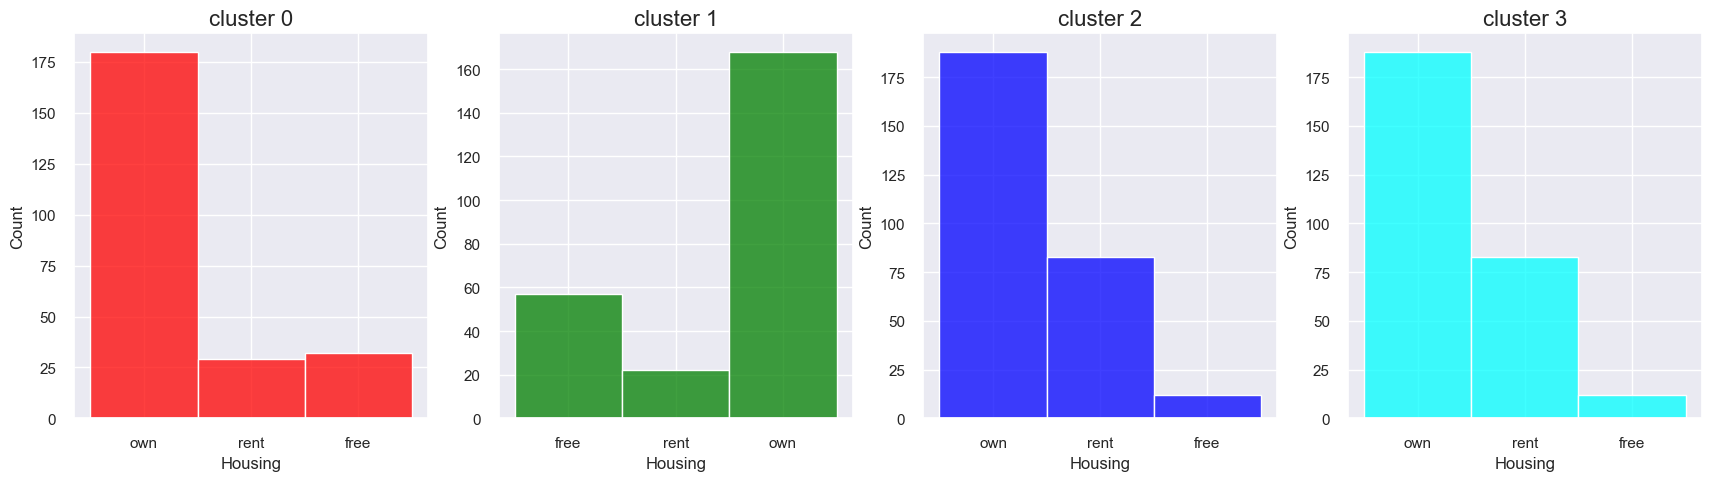

In [45]:
# Plot comparison Housing from each cluster
plt.figure(figsize=(21,5)) # Setting figure size
plt.subplot(1,4,1) # Plot 1
sns.histplot(cluster_0['Housing'], color = 'red') # Histogram
plt.title('cluster 0', size = 16) # Srting title
plt.subplot(1,4,2) # Plot 2
sns.histplot(cluster_1['Housing'], color='green' ) # Histogram
plt.title('cluster 1', size = 16) # Setting title
plt.subplot(1,4,3) # Plot 3
sns.histplot(cluster_2['Housing'], color='blue') # Histogram
plt.title('cluster 2', size = 16) # Setting title
plt.subplot(1,4,4) # Plot 3
sns.histplot(cluster_2['Housing'], color='cyan') # Histogram
plt.title('cluster 3', size = 16)  # Setting title
plt.show() # Showing plot

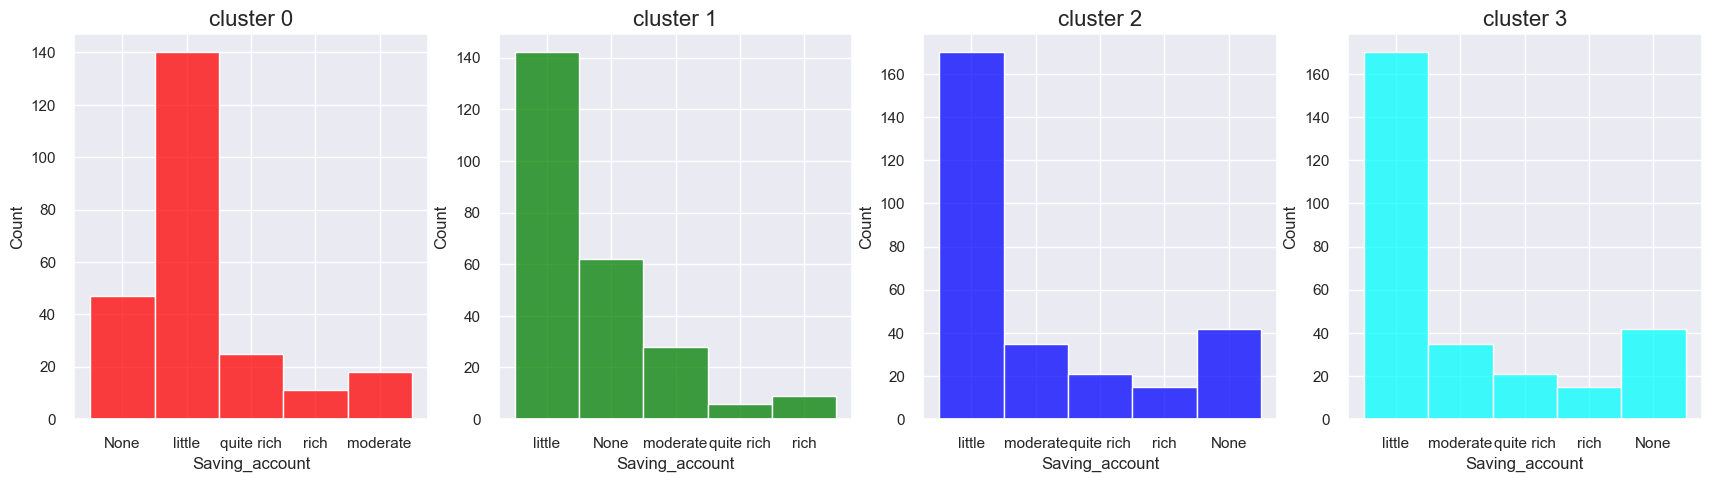

In [46]:
# Plot comparison Saving account from each cluster
plt.figure(figsize=(21,5)) # Setting figure size
plt.subplot(1,4,1) # Plot 1
sns.histplot(cluster_0['Saving_account'], color = 'red') # Histogram
plt.title('cluster 0', size = 16) # Srting title
plt.subplot(1,4,2) # Plot 2
sns.histplot(cluster_1['Saving_account'], color='green' ) # Histogram
plt.title('cluster 1', size = 16) # Setting title
plt.subplot(1,4,3) # Plot 3
sns.histplot(cluster_2['Saving_account'], color='blue') # Histogram
plt.title('cluster 2', size = 16) # Setting title
plt.subplot(1,4,4) # Plot 3
sns.histplot(cluster_2['Saving_account'], color='cyan') # Histogram
plt.title('cluster 3', size = 16)  # Setting title
plt.show() # Showing plot

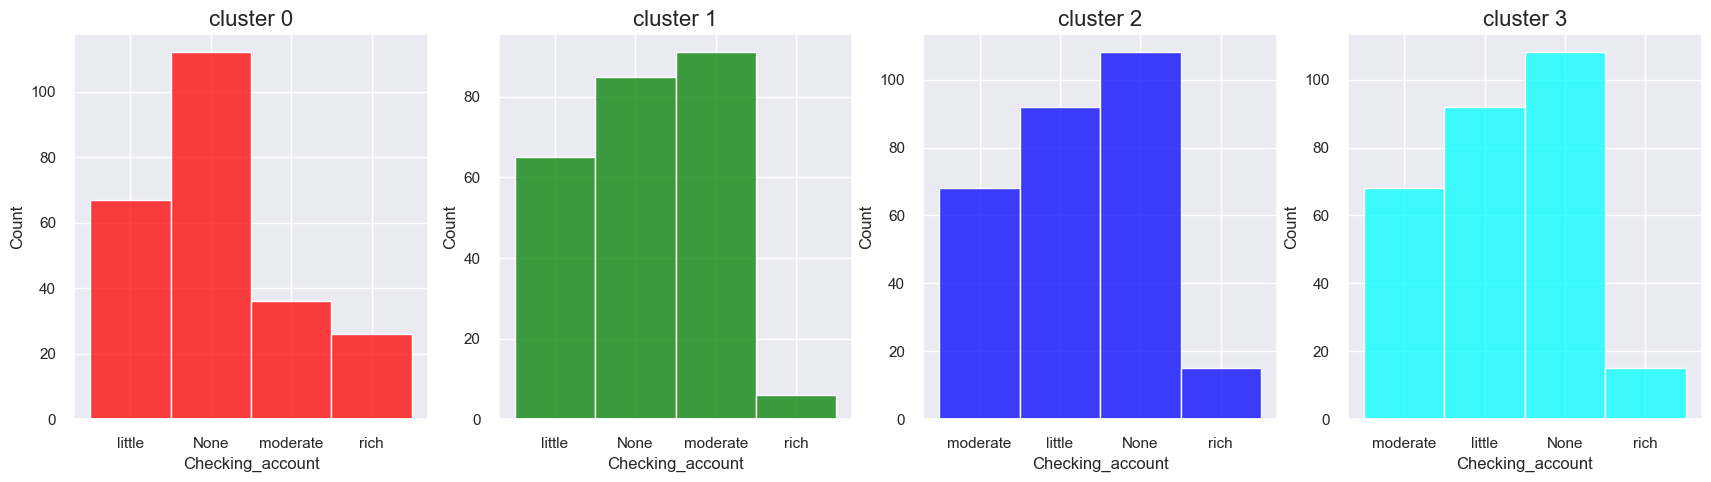

In [47]:
# Plot comparison Checking account from each cluster
plt.figure(figsize=(21,5)) # Setting figure size
plt.subplot(1,4,1) # Plot 1
sns.histplot(cluster_0['Checking_account'], color = 'red') # Histogram
plt.title('cluster 0', size = 16) # Srting title
plt.subplot(1,4,2) # Plot 2
sns.histplot(cluster_1['Checking_account'], color='green' ) # Histogram
plt.title('cluster 1', size = 16) # Setting title
plt.subplot(1,4,3) # Plot 3
sns.histplot(cluster_2['Checking_account'], color='blue') # Histogram
plt.title('cluster 2', size = 16) # Setting title
plt.subplot(1,4,4) # Plot 3
sns.histplot(cluster_2['Checking_account'], color='cyan') # Histogram
plt.title('cluster 3', size = 16)  # Setting title
plt.show() # Showing plot

## **OVERALL ANALYSIS**

Cluster 0 :

In general, this is a cluster with an average age of 50 years a credit amount of 4 million to 18 million rupiahs, and a duration of 4 to 42 months. The average customer has 1 to 2 types of work. The majority of housing type in cluster 0 is the own type, with a low quantity of rent and free housing. Then cluster 0 is dominated by customers with little saving account types and no checking accounts.

Cluster 1 :

In general, this is a cluster with an average age of 40 years a credit amount of 22 million rupiahs, and a duration of 12 to 72 months. The average customer has 2 to 3 types of work. The majority of housing type in cluster 0 is the own type, with a low quantity of rent and free housing. Then cluster 0 is dominated by customers with a litle saving account type and a moderate checking account.

Cluster 2 :

In general, this is a cluster with an average age of 30 years a credit amount of 3 million to 11 million rupiahs, and a duration of 6 to 48 months. The average customer has 2 types of work. The majority of housing types in cluster 0 are own and rent types, with a low quantity of free housing. Then cluster 0 is dominated by customers with little saving account types and no checking accounts.

Cluster 3 :

In general, this is a cluster with an average age of 30 years a credit amount of 3 million to 5 million rupiahs, and a duration of 4 to 18 months. The average customer has 2 types of work. The majority of housing types in cluster 0 are own and rent types, with a low quantity of free housing. Then cluster 0 is dominated by customers with little saving account types and no checking accounts.

|Cluster|Age Average|Credit Amount|Duration|Number of Jobs|Housing|Saving Account|Checking Account|
|:-----:|:---------:|:-----------:|:------:|:------------:|:-----:|:------------:|:--------------:|
|Cluster 0| 50 Years|4-18 million rupiahs|4-42 months|1-2 jobs|own|Litle|None|
|Cluster 1| 40 Years|22 million rupiahs|12-72 months|2-3 jobs|own|Litle|Moderate|
|Cluster 2| 30 Years|3-11 million rupiahs|6-48 months|2 jobs|own & rent|Litle|None|
|Cluster 3| 30 Years|3-5 million rupiahs|4-18 months|2 jobs|own & rent|Litle|None|

Based on the results of the previous cluster analysis, it can be concluded that the sequence of clusters from high ability to low ability is cluster 1, cluster 0, cluster 2, and cluster 3. It can be said that cluster 1 is a high cluster, cluster 0 is a middle cluster, cluster 2 is a cluster low, and cluster 3 is the near default cluster. As for the credit risk itself, the lower the class of the customer, the higher the risk of default, because based on the analysis of previous data, the customer is considered to have lower ability than the class above. Thus, save credit can be ascertained from customers in cluster 1 and cluster 0. As for cluster 2, a review is needed. Then for cluster 3, it is felt to have a high probability of default.